In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("/home/admn/Desktop/lin_student_dataset.csv")
df

,hours,scores
0,1,12
1,2,66
2,3,35
3,4,78
4,5,99


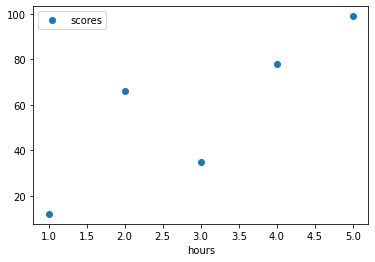

In [19]:
df.plot(x="hours", y="scores", style="o")
plt.show()

In [20]:
x_mean = df["hours"].mean()
y_mean = df["scores"].mean()
print(x_mean, y_mean)

3.0 58.0


In [21]:
df["x"] = df["hours"] - x_mean
df["y"] = df["scores"] - y_mean
df["x*y"] = df["x"] * df["y"]
df["x^2"] = df["x"]**2
df["y^2"] = df["y"]**2
df

,hours,scores,x,y,x*y,x^2,y^2
0,1,12,-2.0,-46.0,92.0,4.0,2116.0
1,2,66,-1.0,8.0,-8.0,1.0,64.0
2,3,35,0.0,-23.0,-0.0,0.0,529.0
3,4,78,1.0,20.0,20.0,1.0,400.0
4,5,99,2.0,41.0,82.0,4.0,1681.0


In [22]:
summation_x_y = df["x*y"].sum()
summation_x_squared = df["x^2"].sum()
summation_y_squared = df["y^2"].sum()
print(summation_x_y, summation_x_squared, summation_y_squared)


186.0 10.0 4790.0


In [23]:
correlation = summation_x_y / (summation_x_squared * summation_y_squared)**0.5
correlation

0.8498556920360142

In [24]:
def getMean(numbers):
    if len(numbers) == 0:
        return None
    else:
        current_sum = 0
        for i in numbers:
            current_sum += i
            current_avg = current_sum/len(numbers)
        return current_avg

In [25]:
def getStandardDeviation(numbers):
    if len(numbers) == 0:
        return 0
    else:
        mean = getMean(numbers)
        std_deviation = 0
        for i in numbers:
            std_deviation += (i - mean)**2
        return (std_deviation/len(numbers))**0.5


In [26]:
std_deviation_x = getStandardDeviation(df["x"].tolist())
std_deviation_y = getStandardDeviation(df["y"].tolist())
print(std_deviation_x, std_deviation_y)

1.4142135623730951 30.95157508108432


In [27]:
m = correlation * (std_deviation_y / std_deviation_x)
m

18.599999999999998

In [28]:
c = df["scores"].mean() - m * df["hours"].mean()
c

2.200000000000003

In [29]:
df["y_prediction"] = m * df["hours"] + c
df

,hours,scores,x,y,x*y,x^2,y^2,y_prediction
0,1,12,-2.0,-46.0,92.0,4.0,2116.0,20.8
1,2,66,-1.0,8.0,-8.0,1.0,64.0,39.4
2,3,35,0.0,-23.0,-0.0,0.0,529.0,58.0
3,4,78,1.0,20.0,20.0,1.0,400.0,76.6
4,5,99,2.0,41.0,82.0,4.0,1681.0,95.2


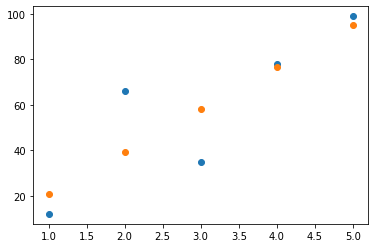

In [30]:
plot1 = plt.scatter(df["hours"], df["scores"])
plot2 = plt.scatter(df["hours"], df["y_prediction"])
plt.show()